In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('insurance.csv')

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006E63482208>,
      dtype=object)

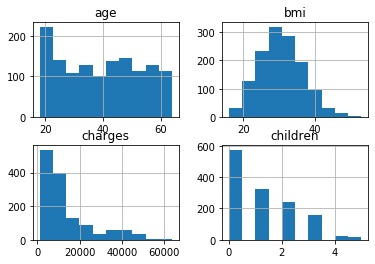

In [6]:
data.hist()

In [7]:
data.groupby('sex').count()

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,662,662,662,662,662,662
male,676,676,676,676,676,676


In [8]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['region'] = data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


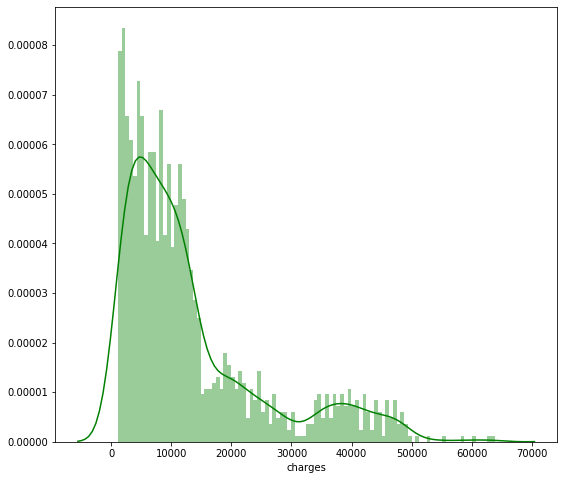

In [11]:
#sebaran data variable target
plt.figure(figsize=(9,8))
sns.distplot(data['charges'] ,color='g', bins=100,hist_kws = {'alpha':0.4})

In [12]:
data['charges'].skew()

1.5158796580240388

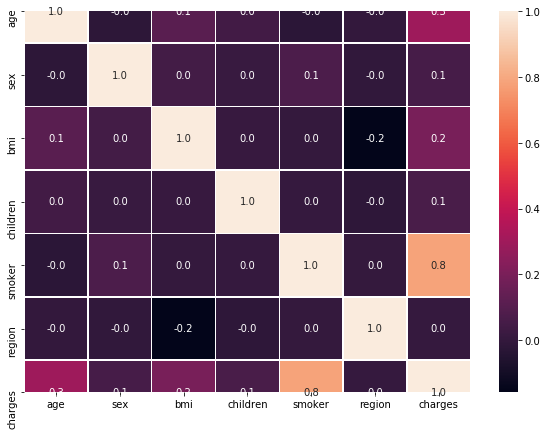

In [13]:
f,ax = plt.subplots(figsize=(10,7))
sns.heatmap(data.corr(), annot=True,linewidths = .5, fmt = '.1f', ax = ax)
plt.show()

In [14]:
X = data.drop(['charges'],axis=1)
y = data['charges']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [16]:
from sklearn.linear_model import LinearRegression
hasil=LinearRegression(copy_X=False,normalize=True)

In [17]:
hasil.fit(X,y)

LinearRegression(copy_X=False, fit_intercept=True, n_jobs=None, normalize=True)

In [20]:
importance = hasil.coef_

In [21]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 257.28807
Feature: 1, Score: -131.11058
Feature: 2, Score: 332.57013
Feature: 3, Score: 479.36939
Feature: 4, Score: 23820.43412
Feature: 5, Score: 353.64002


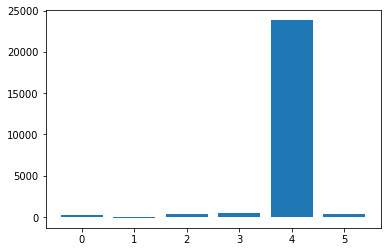

In [22]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [23]:
hasil.fit(X_train, y_train)

LinearRegression(copy_X=False, fit_intercept=True, n_jobs=None, normalize=True)

In [24]:
y_pred = hasil.predict(X_test)

In [25]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4186.508898366437
Mean Squared Error: 33635210.43117844
Root Mean Squared Error: 5799.587091438359


In [26]:
hasil.score(X_test, y_test)

0.7833463107364536

In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
764,9095.06825,8924.407244
887,5272.17580,7116.295018
890,29330.98315,36909.013521
1293,9301.89355,9507.874691
259,33750.29180,27013.350008
...,...,...
109,47055.53210,39116.968669
575,12222.89830,11814.555568
535,6067.12675,7638.107736
543,63770.42801,40959.081722


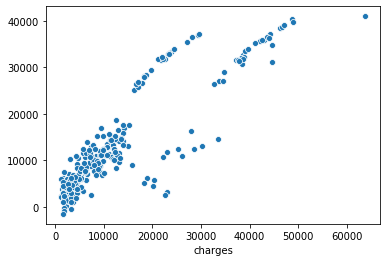

In [28]:
sns.scatterplot(y_test,y_pred)